In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'one_hot_encoding.ipynb',
 'test.csv',
 'Titanic.ipynb',
 'Titanic_submission.csv',
 'train.csv',
 'Untitled.ipynb']

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

# EDA 시각화

In [6]:
def pie_chart(feature):
    feature_ratio = train_df[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train_df[train_df['Survived'] == 1][feature].value_counts()
    dead = train_df[train_df['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect = 'auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratiointotal')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')
        plt.show()

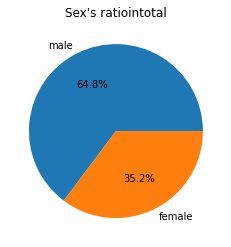

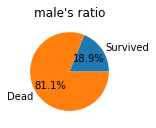

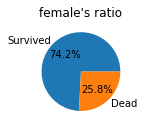

In [7]:
pie_chart('Sex')

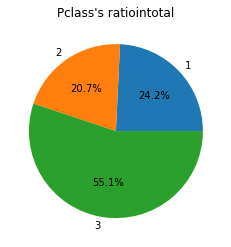

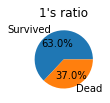

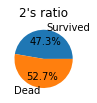

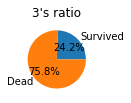

In [8]:
pie_chart('Pclass')

In [9]:
def bar_chart(feature):
    survived = train_df[train_df['Survived'] == 1][feature].value_counts()
    dead = train_df[train_df['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

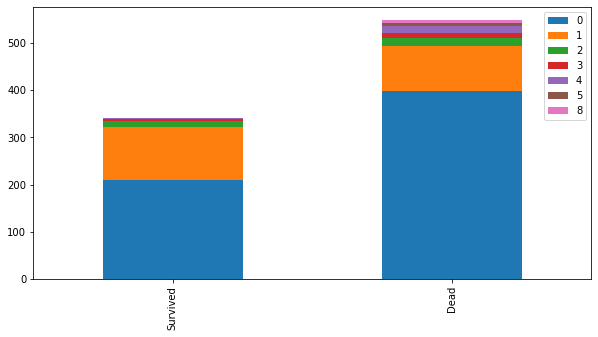

In [10]:
bar_chart('SibSp')

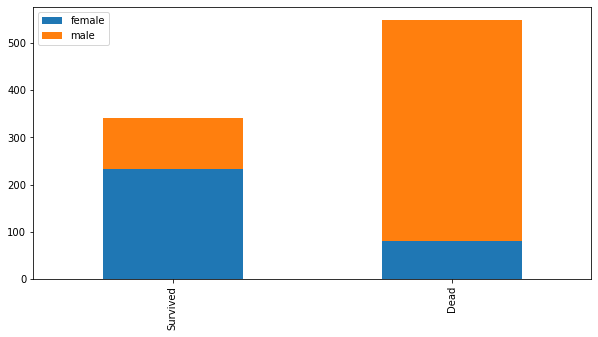

In [11]:
bar_chart('Sex')

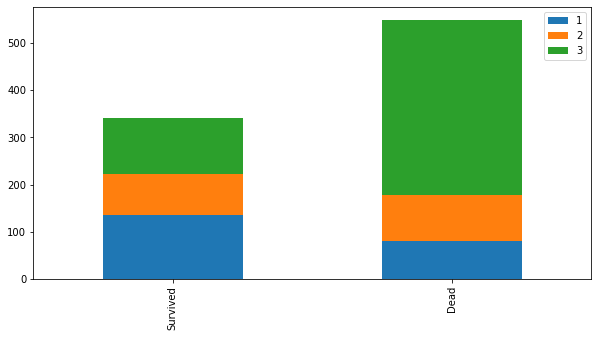

In [12]:
bar_chart('Pclass')

# 전처리

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## (이름, 티켓번호 삭제)

In [15]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [17]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [18]:
test_df.head(2)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S


## 더미화 (pcalss)

In [19]:
pclass_train_dummies = pd.get_dummies(train_df['Pclass'])
pclass_test_dummies = pd.get_dummies(test_df['Pclass'])

pclass_train_dummies.columns = ['1','2','3']
pclass_test_dummies.columns = ['1','2','3']

train_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

train_df = train_df.join(pclass_train_dummies)
test_df = test_df.join(pclass_test_dummies)

In [20]:
train_df.rename(columns={'1':'First class',
                        '2':'Business class',
                        '3': 'Economy class'}, inplace=True)

test_df.rename(columns={'1':'First class',
                        '2':'Business class',
                        '3': 'Economy class'}, inplace=True)

In [21]:
train_df.head(2)

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,First class,Business class,Economy class
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0


In [22]:
test_df.head(2)

,PassengerId,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,First class,Business class,Economy class
0,892,male,34.5,0,0,7.8292,NaN,Q,0,0,1
1,893,female,47.0,1,0,7.0000,NaN,S,0,0,1


## 더미화 (Embarked)

In [23]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
train_df.loc[train_df['Embarked'].isna()]

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,First class,Business class,Economy class
61,1,female,38.0,0,0,80.0,B28,NaN,1,0,0
829,1,female,62.0,0,0,80.0,B28,NaN,1,0,0


In [25]:
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S', inplace=True)

In [26]:
embarked_train_dimmies = pd.get_dummies(train_df['Embarked'])
embarked_test_dimmies = pd.get_dummies(test_df['Embarked'])

embarked_train_dimmies.columns = ['C', 'S', 'Q']
embarked_test_dimmies.columns = ['C', 'S', 'Q']

train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

train_df = train_df.join(embarked_train_dimmies)
test_df = test_df.join(embarked_test_dimmies)

## 더미화 (sex)

In [27]:
sex_train_dummies = pd.get_dummies(train_df['Sex'])
sex_test_dummies = pd.get_dummies(test_df['Sex'])

sex_train_dummies.columns = ['male', 'female']
sex_test_dummies.columns = ['male', 'female']

train_df.drop(['Sex'], axis=1, inplace=True)
test_df.drop(['Sex'], axis=1, inplace=True)

train_df = train_df.join(sex_train_dummies)
test_df = test_df.join(sex_test_dummies)

In [28]:
train_df.head(2)

,Survived,Age,SibSp,Parch,Fare,Cabin,First class,Business class,Economy class,C,S,Q,male,female
0,0,22.0,1,0,7.2500,NaN,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,C85,1,0,0,1,0,0,1,0


In [29]:
test_df.head(2)

,PassengerId,Age,SibSp,Parch,Fare,Cabin,First class,Business class,Economy class,C,S,Q,male,female
0,892,34.5,0,0,7.8292,NaN,0,0,1,0,1,0,0,1
1,893,47.0,1,0,7.0000,NaN,0,0,1,0,0,1,1,0


## 더미화 (Age)

In [30]:
test_df.loc[test_df['Age'].isna()]

,PassengerId,Age,SibSp,Parch,Fare,Cabin,First class,Business class,Economy class,C,S,Q,male,female
10,902,NaN,0,0,7.8958,NaN,0,0,1,0,0,1,0,1
22,914,NaN,0,0,31.6833,NaN,1,0,0,0,0,1,1,0
29,921,NaN,2,0,21.6792,NaN,0,0,1,1,0,0,0,1
33,925,NaN,1,2,23.4500,NaN,0,0,1,0,0,1,1,0
36,928,NaN,0,0,8.0500,NaN,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,NaN,0,0,7.7208,NaN,0,0,1,0,1,0,1,0
410,1302,NaN,0,0,7.7500,NaN,0,0,1,0,1,0,1,0
413,1305,NaN,0,0,8.0500,NaN,0,0,1,0,0,1,0,1
416,1308,NaN,0,0,8.0500,NaN,0,0,1,0,0,1,0,1


In [31]:
round(train_df['Age'].mean())

30

In [32]:
train_df['Age'].fillna(round(train_df['Age'].mean()), inplace=True)

In [33]:
test_df['Age'].fillna(round(train_df['Age'].mean()), inplace=True)

In [34]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,First class,Business class,Economy class,C,S,Q,male,female
0,0,22.0,1,0,7.2500,NaN,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,C85,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,NaN,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,C123,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,NaN,0,0,1,0,0,1,0,1


## 더미화 (Cabin)

In [38]:
train_df.loc[train_df['Cabin'].isna()]

,Survived,Age,SibSp,Parch,Fare,Cabin,First class,Business class,Economy class,C,S,Q,male,female
0,0,22.0,1,0,7.2500,NaN,0,0,1,0,0,1,0,1
2,1,26.0,0,0,7.9250,NaN,0,0,1,0,0,1,1,0
4,0,35.0,0,0,8.0500,NaN,0,0,1,0,0,1,0,1
5,0,30.0,0,0,8.4583,NaN,0,0,1,0,1,0,0,1
7,0,2.0,3,1,21.0750,NaN,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,25.0,0,0,7.0500,NaN,0,0,1,0,0,1,0,1
885,0,39.0,0,5,29.1250,NaN,0,0,1,0,1,0,1,0
886,0,27.0,0,0,13.0000,NaN,0,1,0,0,0,1,0,1
888,0,30.0,1,2,23.4500,NaN,0,0,1,0,0,1,1,0


In [43]:
train_df

,Survived,Age,SibSp,Parch,Fare,Cabin,First class,Business class,Economy class,C,S,Q,male,female
0,0,22.0,1,0,7.2500,NaN,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,C85,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,NaN,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,C123,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,NaN,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,NaN,0,1,0,0,0,1,0,1
887,1,19.0,0,0,30.0000,B42,1,0,0,0,0,1,1,0
888,0,30.0,1,2,23.4500,NaN,0,0,1,0,0,1,1,0
889,1,26.0,0,0,30.0000,C148,1,0,0,1,0,0,0,1


In [44]:
train_df.drop(['Cabin'], axis=1, inplace=True)
test_df.drop(['Cabin'], axis=1, inplace=True)

In [45]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,First class,Business class,Economy class,C,S,Q,male,female
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [46]:
test_df.head()

,PassengerId,Age,SibSp,Parch,Fare,First class,Business class,Economy class,C,S,Q,male,female
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,0,1,1,0
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,0,1
3,895,27.0,0,0,8.6625,0,0,1,0,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,0,1,1,0


## 나머지 변수 확인

In [48]:
train_df.loc[train_df['SibSp'].isna()]

,Survived,Age,SibSp,Parch,Fare,First class,Business class,Economy class,C,S,Q,male,female


In [53]:
test_df.loc[test_df['SibSp'].isna()]

,PassengerId,Age,SibSp,Parch,Fare,First class,Business class,Economy class,C,S,Q,male,female


In [54]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [55]:
test_df['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Age             891 non-null    float64
 2   SibSp           891 non-null    int64  
 3   Parch           891 non-null    int64  
 4   Fare            891 non-null    float64
 5   First class     891 non-null    uint8  
 6   Business class  891 non-null    uint8  
 7   Economy class   891 non-null    uint8  
 8   C               891 non-null    uint8  
 9   S               891 non-null    uint8  
 10  Q               891 non-null    uint8  
 11  male            891 non-null    uint8  
 12  female          891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB


In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            417 non-null    float64
 5   First class     418 non-null    uint8  
 6   Business class  418 non-null    uint8  
 7   Economy class   418 non-null    uint8  
 8   C               418 non-null    uint8  
 9   S               418 non-null    uint8  
 10  Q               418 non-null    uint8  
 11  male            418 non-null    uint8  
 12  female          418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 19.7 KB


In [88]:
test_df['Fare'].fillna(0, inplace=True)

In [91]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   First class     418 non-null    uint8  
 6   Business class  418 non-null    uint8  
 7   Economy class   418 non-null    uint8  
 8   C               418 non-null    uint8  
 9   S               418 non-null    uint8  
 10  Q               418 non-null    uint8  
 11  male            418 non-null    uint8  
 12  female          418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 19.7 KB


## 데이터 분할

In [96]:
train_df.head(2)

,Survived,Age,SibSp,Parch,Fare,First class,Business class,Economy class,C,S,Q,male,female
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0


In [97]:
test_df.head(2)

,PassengerId,Age,SibSp,Parch,Fare,First class,Business class,Economy class,C,S,Q,male,female
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,0,1,1,0


In [98]:
x_train_df = train_df.drop(['Survived'], axis=1)
y_train_df = train_df['Survived']
x_test_df = test_df.drop(['PassengerId'], axis=1).copy()

In [99]:
x_train_df.head(2)

,Age,SibSp,Parch,Fare,First class,Business class,Economy class,C,S,Q,male,female
0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0


In [100]:
y_train_df.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [101]:
x_test_df.head(2)

,Age,SibSp,Parch,Fare,First class,Business class,Economy class,C,S,Q,male,female
0,34.5,0,0,7.8292,0,0,1,0,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,0,1,1,0


## 모델링

In [102]:
logreg = LogisticRegression()
logreg.fit(x_train_df, y_train_df)

y_pred = logreg.predict(x_test_df)

logreg.score(x_train_df, y_train_df)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8035914702581369

In [109]:
pd.DataFrame({'PassengerId':test_df['PassengerId'],
             'Survived':y_pred})

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [111]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train_df, y_train_df)

y_pred = random_forest.predict(x_test_df)

random_forest.score(x_train_df, y_train_df)

0.9797979797979798

In [112]:
pd.DataFrame({'PassengerId':test_df['PassengerId'],
             'Survived':y_pred})

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
